### Exercise 3. 

Dùng thuật toán gradient descent tối ưu hàm f(x) = x^2, với giá trị khởi tạo x = 2 và thử các learning rate khác nhau (0.2, 1, 2), vẽ đồ thị hàm loss để hiện sự thay đổi hàm f(x) sau các bước update.

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [157]:
plt.style.use('seaborn')

In [158]:
def f(x):
    return x**2

In [159]:
def df(x):
    return 2*x

In [166]:
def visualize(f, fig):
    x = np.linspace(-3, 3, 100)
    y = f(x)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    fig.plot(x, y, 'y', linewidth=1)

In [167]:
def gradient_descent(f, x_init=2, learning_rate=0.2, max_iteration=300, epsilon=1e-8):
    X = [x_init]
    iteration = 0
    while iteration < max_iteration:
        x_update = x_init - learning_rate*df(x_init)
        X.append(x_update)
        if abs(x_update - x_init) < epsilon:
            break
        else:
            x_init = copy.copy(x_update)
            iteration += 1
    return x_update, X

AttributeError: 'int' object has no attribute 'hypot'

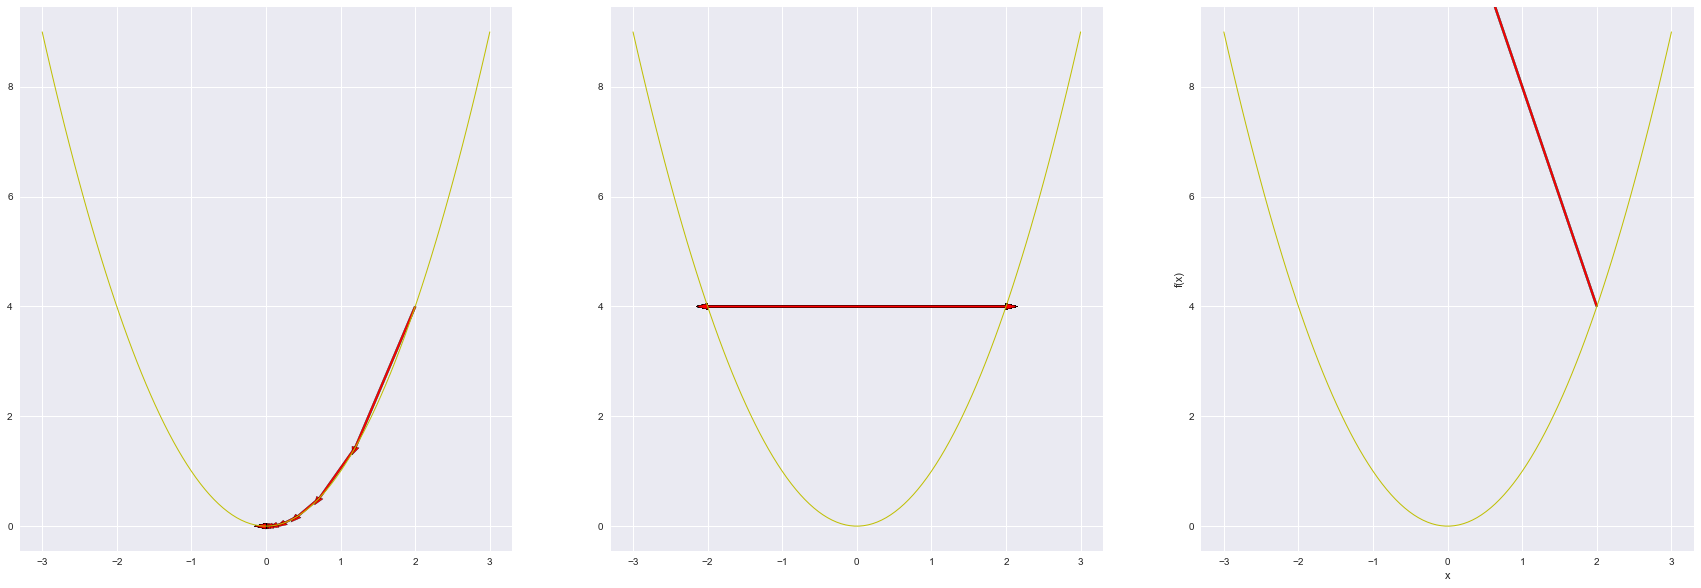

In [168]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
lr_list = [0.2, 1, 2]
for i, ax in enumerate(ax):
    visualize(f, ax)
    _, X = gradient_descent(f, learning_rate=lr_list[i])
    for x,y in zip(X[:-1], X[1:]):
        #print(x,y)
        ax.arrow(x, f(x), y-x, f(y)-f(x), fc='r', width = 0.03, head_width = 0.1)

In [183]:
global learning_rate
def plot_loss(f, x_init=2, learning_rate=0.2, max_iteration=20):
    plt.xlabel("Iteration")
    plt.ylabel("Value")
    plt.title("Loss")
    X = [x_init]
    Y = [f(x_init)]
    iteration = 0
    while iteration < max_iteration:
        x_update = x_init - learning_rate*df(x_init)
        X.append(x_update)
        Y.append(f(x_update))
        iteration += 1
    plt.plot(Y, label=str(learning_rate))
    plt.legend(title='learning rate')
    plt.show()

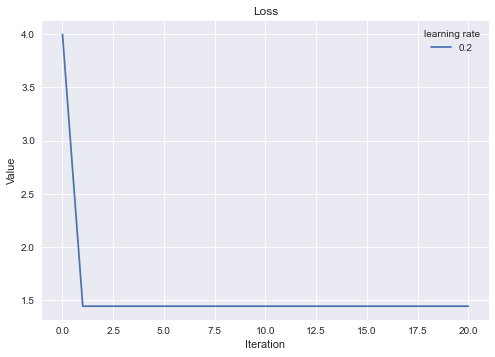

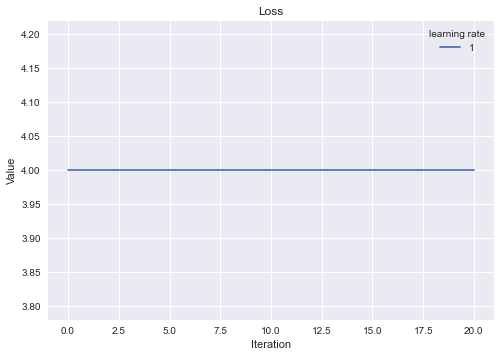

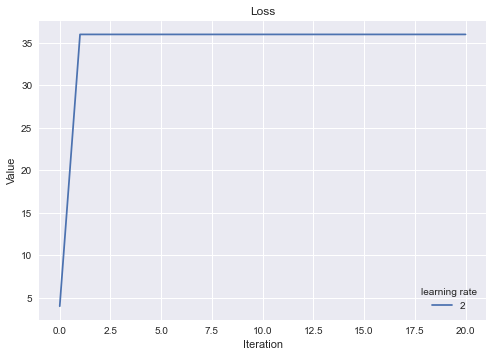

In [184]:
learning_rate = [0.2, 1, 2]
for i in learning_rate:
    plot_loss(f, x_init=2, learning_rate=i, max_iteration=20)

### Exercise 4.

Dùng thuật toán logistic regression phân loại hồ sơ cho vay hay không với dữ liệu ở đây (https://github.com/nttuan8/DL_Tutorial/blob/master/L2/dataset.csv), input là lương, thời gian làm việc, output là cho vay hay không.
1. Xây dựng model, tìm tham số.
2. Dự đoán với các hồ sơ sau: (lương 2, thời gian: 3), (lương: 1, thời gian: 8), (lương: 5, thời gian: 5).

In [209]:
data = pd.read_csv('https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L2/dataset.csv')
data.head()

,Lương,Thời gian làm việc,Cho vay
0,10,1.0,1
1,5,2.0,1
2,6,1.8,1
3,7,1.0,1
4,8,2.0,1


In [224]:
def sigmoid_func(z):
    sigmoid = 1/(1 + np.exp(-z))
    return sigmoid

In [225]:
def Loss_func(Y, X, w):
    Loss = -np.mean(Y * np.log(sigmoid(np.dot(X, w))) + (1-Y) * np.log(1-sigmoid(np.dot(X, w))))
    return Loss

In [226]:
X = data.drop(columns='Cho vay')
Y = pd.DataFrame(data['Cho vay'])
X['x0'] = pd.Series(np.ones(len(X)))

In [227]:
X.head()

,Lương,Thời gian làm việc,x0
0,10,1.0,1.0
1,5,2.0,1.0
2,6,1.8,1.0
3,7,1.0,1.0
4,8,2.0,1.0


In [228]:
X.shape

(20, 3)

In [229]:
Y.shape

(20, 1)

In [240]:
# intitialize w
w = pd.DataFrame(np.zeros(shape=X.shape[1]))

iteration = 300
learning_rate = 2
L = [] 

for _ in range(iteration):
    error = Loss_func(Y, X, w)
    L.append(error)   # Update list of Loss after each iteration
    for i in range(X.shape[1]):
        w[0][i] = w[0][i] - learning_rate*np.mean((sigmoid_func(np.dot(X, w)) - Y.to_numpy()).T * X.to_numpy()[:, i])
print('Loss = {}'.format(L[-1]))

<ipython-input-225-0225da27b1b9>:2: RuntimeWarning: divide by zero encountered in log
  Loss = -np.mean(Y * np.log(sigmoid(np.dot(X, w))) + (1-Y) * np.log(1-sigmoid(np.dot(X, w))))


Loss = Cho vay    0.013995
dtype: float64


In [238]:
w0 = w[0][0]
w1 = w[0][1]
w2 = w[0][2]
print(w0)
print(w1)
print(w2)

2.405467850681164
13.560835315928014
-26.02138535989142


Text(0, 0.5, 'Iteration')

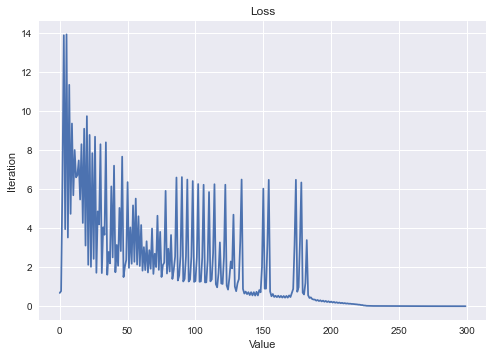

In [257]:
plt.plot(L)
plt.title('Loss')
plt.xlabel('Value')
plt.ylabel('Iteration')

In [244]:
test = pd.DataFrame(data=np.array([[2, 3], [1, 8], [5, 5]]), columns=['Lương', 'Thời gian làm việc'])
test['x0'] = pd.Series(np.ones(len(X)))
test

,Lương,Thời gian làm việc,x0
0,2,3,1.0
1,1,8,1.0
2,5,5,1.0


In [258]:
prediction = sigmoid(np.dot(test, w))
prediction

array([[1.],
       [1.],
       [1.]])